### Name: Anjum Rohra

## Data Science and Business Analytics

## Task 1: Prediction using Supervised ML
This task is implemented using a simple Linear Regression model as it involves only two variables (i.e.) No. of hours studied and Scores obtained by the students. The model predicts the score obtained based on the number of hours a student devotes in studies. Higher the study hours, higher the score obtained. Here, no. of hours is independent variable and score obtained is a dependent variable

## Importing required modules

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

## Converting .csv input to dataframe

In [105]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Analysis of input data

### No. of rows and columns in the dataset

In [106]:
df.shape

(25, 2)

### Datatypes of all the columns within the dataset

In [107]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

### Summary of all the numeric columns

In [108]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Correlation between the variables

In [109]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


As seen above, there is a strong correlation between the scores and number of hours

## Plotting the data

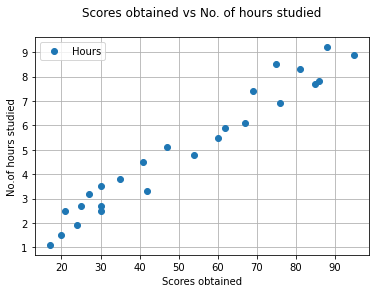

In [110]:
df.plot(x='Scores', y='Hours',style='o',grid=True)
plt.xlabel('Scores obtained')
plt.ylabel('No.of hours studied')
plt.title('Scores obtained vs No. of hours studied\n');

It can be seen from the graph that more the number of hours devoted, higher is the score achieved

## Preparing the data (Separating Independent & Dependent variables)

In [111]:
x = df.iloc[:,:-1].values 
y = df.iloc[:, 1].values

## Splitting the data into Train and Test sets

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [113]:
print("x_train.shape = ",x_train.shape) 
print("y_train.shape = ",y_train.shape)
print("x_test.shape = ",x_test.shape) 
print("y_test.shape = ",y_test.shape) 

x_train.shape =  (20, 1)
y_train.shape =  (20,)
x_test.shape =  (5, 1)
y_test.shape =  (5,)


In [114]:
print(x_test)
print(y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[20 27 69 30 62]


## Linear Regression Model on Train set

In [115]:
lr = LinearRegression()
train = lr.fit(x_train,y_train)
print("Training Done!")

Training Done!


In [116]:
slope = train.coef_
intercept = train.intercept_
print("Slope = ",slope)
print("Intercept = ",intercept)

Slope =  [9.91065648]
Intercept =  2.018160041434683


### Plotting the regression line => y=mx+c

In [117]:
r_line = (slope*x) + intercept
r_line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

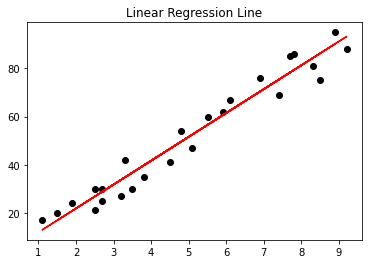

In [118]:
plt.plot(x,y,'o',color='black')
plt.plot(x, r_line, color='red')
plt.title("Linear Regression Line");

## Predicting the scores

In [119]:
prediction = lr.predict(x_test)
prediction
# type(prediction)

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Comparing the actual scores with the predicted scores

In [120]:
compare = pd.DataFrame({'Actual':y_test, 'Predicted':prediction})
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [121]:
train.score(x_test,y_test)

0.9454906892105356

## Testing the data with actual values

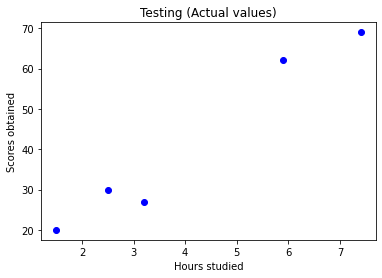

In [122]:
plt.scatter(x_test,y_test,color="blue")
plt.xlabel("Hours studied")
plt.ylabel("Scores obtained")
plt.title("Testing (Actual values)")
plt.plot();

## Testing the data with predicted values

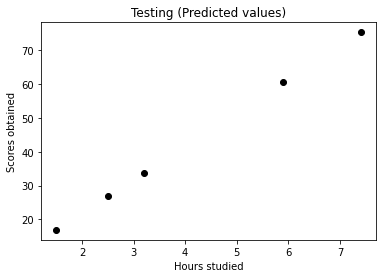

In [123]:
plt.scatter(x_test,prediction,color="black")
plt.xlabel("Hours studied")
plt.ylabel("Scores obtained")
plt.title("Testing (Predicted values)")
plt.plot();

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [124]:
sample = lr.predict([[9.25]])
print("If a student studies for 9.25 hours/day, he may obtain a score of",sample[0],"marks")

If a student studies for 9.25 hours/day, he may obtain a score of 93.69173248737538 marks


## Evaluation of model performance based on various metrics

In [125]:
MAE = metrics.mean_absolute_error(y_test,prediction)
print("Mean Absolute Error: ",MAE)

Mean Absolute Error:  4.183859899002975


In [126]:
MSE = metrics.mean_squared_error(y_test,prediction)
print("Mean Square Error: ",MSE)

Mean Square Error:  21.5987693072174


In [127]:
RMSE = np.sqrt(MSE)
print("Root Mean Square Error: ",RMSE)

Root Mean Square Error:  4.6474476121003665


In [128]:
R2 = metrics.r2_score(y_test,prediction)
print("R2_score: ",R2)

R2_score:  0.9454906892105356
